In [1]:
# standard packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# local package dependencies
import os
import sys
sys.path.append(os.path.abspath("../../scripts/"))
from impact_vectors import create_impact_pool

# Load the impact metrics

In [81]:
df = pd.read_csv("data/arb-impact-metrics.csv",index_col=0)
df.drop(columns=['project_id_1'], inplace=True)
df['retained_users'] = df['active_users'] / df['total_users']
df['avg_parttime_devs_6_months'] = df['avg_active_devs_6_months'] - df['avg_fulltime_devs_6_months']
df['l2_gas_6_months'] = df['l2_gas_6_months'] / 1e12
df['total_l2_gas'] = df['total_l2_gas'] / 1e12
df.shape

(290, 32)

In [82]:
df['total_l2_gas'].sum()

228.74295987812

In [83]:
df.iloc[-1].T

project_name                                             Solady
first_commit_date                2022-07-16 23:39:45.000000 UTC
last_commit_date                 2024-02-24 21:30:29.000000 UTC
repos                                                         1
stars                                                      1961
forks                                                       241
contributors                                                 45
contributors_6_months                                        24
new_contributors_6_months                                    15
avg_fulltime_devs_6_months                                  1.0
avg_active_devs_6_months                               1.666667
commits_6_months                                          292.0
issues_opened_6_months                                     18.0
issues_closed_6_months                                     20.0
pull_requests_opened_6_months                             235.0
pull_requests_merged_6_months           

# Configure the impact pools

In [84]:
dev_growth_pool = create_impact_pool(
    df,
    impact_vectors={
        'avg_fulltime_devs_6_months': ('linear', .6),
        'avg_parttime_devs_6_months': ('linear', .2),        
        'new_contributors_6_months': ('log', .2)
    }
    
)
dev_growth_pool.head(20)

,project_name,avg_fulltime_devs_6_months,avg_parttime_devs_6_months,new_contributors_6_months,wtd_avg_fulltime_devs_6_months,wtd_avg_parttime_devs_6_months,wtd_new_contributors_6_months,pool_score
project_id,,,,,,,,
LOZXloZfVxGx7h5Na3R-5RcR86-mMDDJuKiE4q_hJOY=,Metamask,22.666667,61.833333,247,6.025865,2.306566,0.220078,8.552509
gHO2CKahfi2EMVYX6Q5B6ZvLcbnTaNrCwk1lniDsEDM=,ThirdWeb,11.333333,11.333333,45,2.857824,0.335757,0.187596,3.381177
LNQR7by2d4x_GcRrl47_US9ZJ1j12JkObQoxSG6oUlM=,Wormhole,9.166667,17.000000,54,2.252169,0.556904,0.191074,3.000147
HW-DsDcsApBwqtMlSu8S7BpNvtLdq5jvBrJD7kxz7pM=,Safe,9.500000,10.500000,76,2.345347,0.303236,0.197593,2.846176
SNdMHnnes04aSQQwpNdWT0uBt6VdKyT3Zog7miIsaK0=,Gitcoin,9.000000,8.166667,23,2.205580,0.212175,0.174792,2.592547
6lg5zQJ4GYDjvO5NvVAfPBWuxNgOeEcLAfcL01ws5Us=,DefiLlama,8.666667,2.000000,602,2.112402,-0.028484,0.237073,2.320991
XyKL4912vsx41aNjTJDLDexSgi4_BcPkilZ8twJlqxI=,Aave,7.833333,8.833333,21,1.879458,0.238193,0.173057,2.290707
MQ7nnuWYy-xZUaG2VfcacaOqlTrUDZqMOzN1TROIKTw=,Livepeer,7.833333,7.333333,12,1.879458,0.179654,0.162381,2.221493
QltZuORSeUv2rFJ2ue2dvqFPlQ6hjG5OKG35dgDq0aM=,Axelar,6.833333,13.333333,38,1.599925,0.413809,0.184370,2.198105


In [85]:
users_pool = create_impact_pool(
    df, 
    impact_vectors={
        'active_users': ('log', 1/3),
        'multi_project_users': ('log', 1/3),
        'retained_users': ('linear', 1/3)
    }
)
users_pool

,project_name,active_users,multi_project_users,retained_users,wtd_active_users,wtd_multi_project_users,wtd_retained_users,pool_score
project_id,,,,,,,,
LNQR7by2d4x_GcRrl47_US9ZJ1j12JkObQoxSG6oUlM=,Wormhole,41869.0,18679.0,0.738600,0.443997,0.273304,0.680765,1.398066
W1Y0YdIHScazGk_CfHebBjnKTvksjvzTHI2Spt8JrBM=,GoodEntry,3673.0,2794.0,0.968874,0.191270,0.166503,0.985580,1.343353
57ErQ5loSD9BlgJCB1nUOKthiQC6uxZ6ZESdKngaphM=,Rainbow,12712.0,4930.0,0.810559,0.320206,0.198425,0.776018,1.294649
tAOz8O7X_w-2n0PWCNtzSQu8U58IG1VnlKycdA8Q55g=,Savvy DeFi,6291.0,3050.0,0.815319,0.247154,0.171431,0.782318,1.200904
CJakpGMh0AAU4wDPTDnHbnWDECXJ5Sr1cAzQGTga7qY=,primex-finance,961.0,793.0,0.983623,0.052027,0.095707,1.005104,1.152838
...,...,...,...,...,...,...,...,...
Q8XI5uvgwOT41A1eWKKVRoQdzjDvYXRtVLpT6n7KVrg=,Gelato,13.0,0.0,0.393939,-0.394849,-1.444492,0.224537,-1.614804
dUJbxMOjq4YBXAkzzNOm-tPG2yRppxVHvjBdKSJ4tfY=,hats-finance,19.0,0.0,0.301587,-0.355438,-1.444492,0.102290,-1.697641
gaC0LNyDnx4Sp_oXK74sQHHKDyKrgxAmT0-BYhls-Og=,Niftyswap,1.0,0.0,0.333333,-0.661223,-1.444492,0.144312,-1.961403


In [86]:
blockspace_pool = create_impact_pool(
    df,
    impact_vectors={
        'l2_gas_6_months': ('log', .5),
        'txns_6_months': ('log', .5)
    }
)
blockspace_pool

,project_name,l2_gas_6_months,txns_6_months,wtd_l2_gas_6_months,wtd_txns_6_months,pool_score
project_id,,,,,,
XSDgPwFuQVcj57ARcKTGrm2w80KKlqJxaBWF6jZqe7w=,Uniswap,10.057010,7178025.0,0.967572,1.024120,1.991692
SV5kdZqv7HuVnB0A9hgFHPi3lubBZ0Tiu0zZS-XMZ-A=,Paraswap,7.170415,2948779.0,0.918296,0.885731,1.804026
UF36qYsUzfwX6GDNuWgpDXrqsmrLcK4Rw5D4hZY5Pxc=,LayerZero,5.335907,3309819.0,0.875254,0.903698,1.778952
EhPGap_lKavTMqT2DUdCSDKsQaAiG99v0Rq__pINhMM=,1Inch,3.780966,2192339.0,0.825079,0.839620,1.664698
xzWBwbu5eZ6QN5D04BxHfZcNq4-9_khDdWiMLYZKhXk=,Stargate Finance,2.514021,2683835.0,0.765637,0.871086,1.636723
...,...,...,...,...,...,...
G9PrA-VHfqLNLSKcm8jZ_FF4Ezts2WbqyXZofndRGIM=,OpenOcean,0.000013,23.0,-1.005903,-0.943850,-1.949752
gYPWrgRG5OLSJggPaUEZnsBzGFeO760OKtzGP6QOaPY=,Lyra Finance,0.000008,25.0,-1.072945,-0.930879,-2.003824
m1cjPMe-kGT9iIZE8pCQ0eoa7gTq7qzGDH9WUP4IuYs=,Aloe II,0.000012,12.0,-1.014015,-1.045054,-2.059069


In [87]:
momentum_pool = create_impact_pool(
    df,
    impact_vectors={
        'active_users': ('log', 1/3),
        'avg_active_devs_6_months': ('log', 1/3),        
        'commits_6_months': ('log', 1/6),        
        'issues_closed_6_months': ('log', 1/6)
    }
    
)
momentum_pool.head(20)

,project_name,active_users,avg_active_devs_6_months,commits_6_months,issues_closed_6_months,wtd_active_users,wtd_avg_active_devs_6_months,wtd_commits_6_months,wtd_issues_closed_6_months,pool_score
project_id,,,,,,,,,,
LOZXloZfVxGx7h5Na3R-5RcR86-mMDDJuKiE4q_hJOY=,Metamask,71248.0,84.500000,16664.0,3234.0,0.499207,0.367679,0.404075,0.494616,1.765576
LNQR7by2d4x_GcRrl47_US9ZJ1j12JkObQoxSG6oUlM=,Wormhole,41869.0,26.166667,2612.0,992.0,0.443997,0.272170,0.251882,0.389590,1.357639
XSDgPwFuQVcj57ARcKTGrm2w80KKlqJxaBWF6jZqe7w=,Uniswap,189562.0,19.666667,662.0,111.0,0.600831,0.248904,0.139153,0.194941,1.183829
QltZuORSeUv2rFJ2ue2dvqFPlQ6hjG5OKG35dgDq0aM=,Axelar,24933.0,20.166667,3035.0,228.0,0.390165,0.250950,0.264209,0.258913,1.164237
HW-DsDcsApBwqtMlSu8S7BpNvtLdq5jvBrJD7kxz7pM=,Safe,1823.0,20.000000,4908.0,1009.0,0.118520,0.250273,0.303684,0.391100,1.063577
XyKL4912vsx41aNjTJDLDexSgi4_BcPkilZ8twJlqxI=,Aave,16318.0,16.666667,4868.0,69.0,0.346140,0.235419,0.303012,0.152689,1.037260
EhPGap_lKavTMqT2DUdCSDKsQaAiG99v0Rq__pINhMM=,1Inch,71936.0,9.000000,982.0,30.0,0.500205,0.185216,0.171538,0.078666,0.935625
57ErQ5loSD9BlgJCB1nUOKthiQC6uxZ6ZESdKngaphM=,Rainbow,12712.0,12.500000,1137.0,121.0,0.320206,0.211980,0.183574,0.202608,0.918369
lTrJShA8bLeyWUn-DHIuT_7591FZ7PXqXscO6gVX4N0=,Connext,5977.0,7.666667,861.0,480.0,0.241837,0.172152,0.160738,0.325074,0.899801


# Visualize each of the pools

In [98]:
N = 50

def render_pool(pool_dataframe):

    pool = (
        pool_dataframe
        .copy()
        .dropna()
        .head(N)
        .iloc[::-1]
    )
    scaled_values = [c for c in pool.columns if 'wtd' in c]
    true_values = [c.replace('wtd_','') for c in scaled_values]
    ylabels = pool['project_name']
    num_cols = len(scaled_values)

    tick_params = dict(axis='both', which='both', labelbottom=False, bottom=False, left=False)
    fig, axes = plt.subplots(
        figsize=(12,10), 
        ncols=num_cols+1, 
        dpi=144, 
        facecolor='white'
    )

    def make_plot(idx, vec, label):
        ax = axes[idx]
        ax.scatter(
            x=pool[vec], 
            y=ylabels, 
            c=pool[vec], 
            cmap='viridis_r', 
            lw=1, 
            edgecolor='black', 
            zorder=2
        )
        ax.text(
            s=label,             
            x=pool[vec].min(), 
            y=N,
            ha='left', 
            weight='bold', 
            fontsize=8
        )
        ylabel = "|\nMax\n"
        if idx < num_cols:
            ylabel += f"{pool_dataframe[true_values[idx]].max():,.0f}"
        else:
            ylabel += "(normalized score)"
        ax.text(
            s=ylabel,
            x=pool[vec].max(), 
            y=0.5,
            ha='right',
            va='top',
            fontsize=8                
        )

        ax.grid(axis='y')
        ax.set_ylim(-1,N)
        ax.spines['left'].set_visible(False)
        ax.set_frame_on(False)
        if i:
            ax.tick_params(**tick_params, labelleft=False)
        else:
            ax.tick_params(**tick_params)

    for (i,v) in enumerate(scaled_values):
        make_plot(i, v, true_values[i])
    
    make_plot(num_cols, 'pool_score', 'pool_score')    

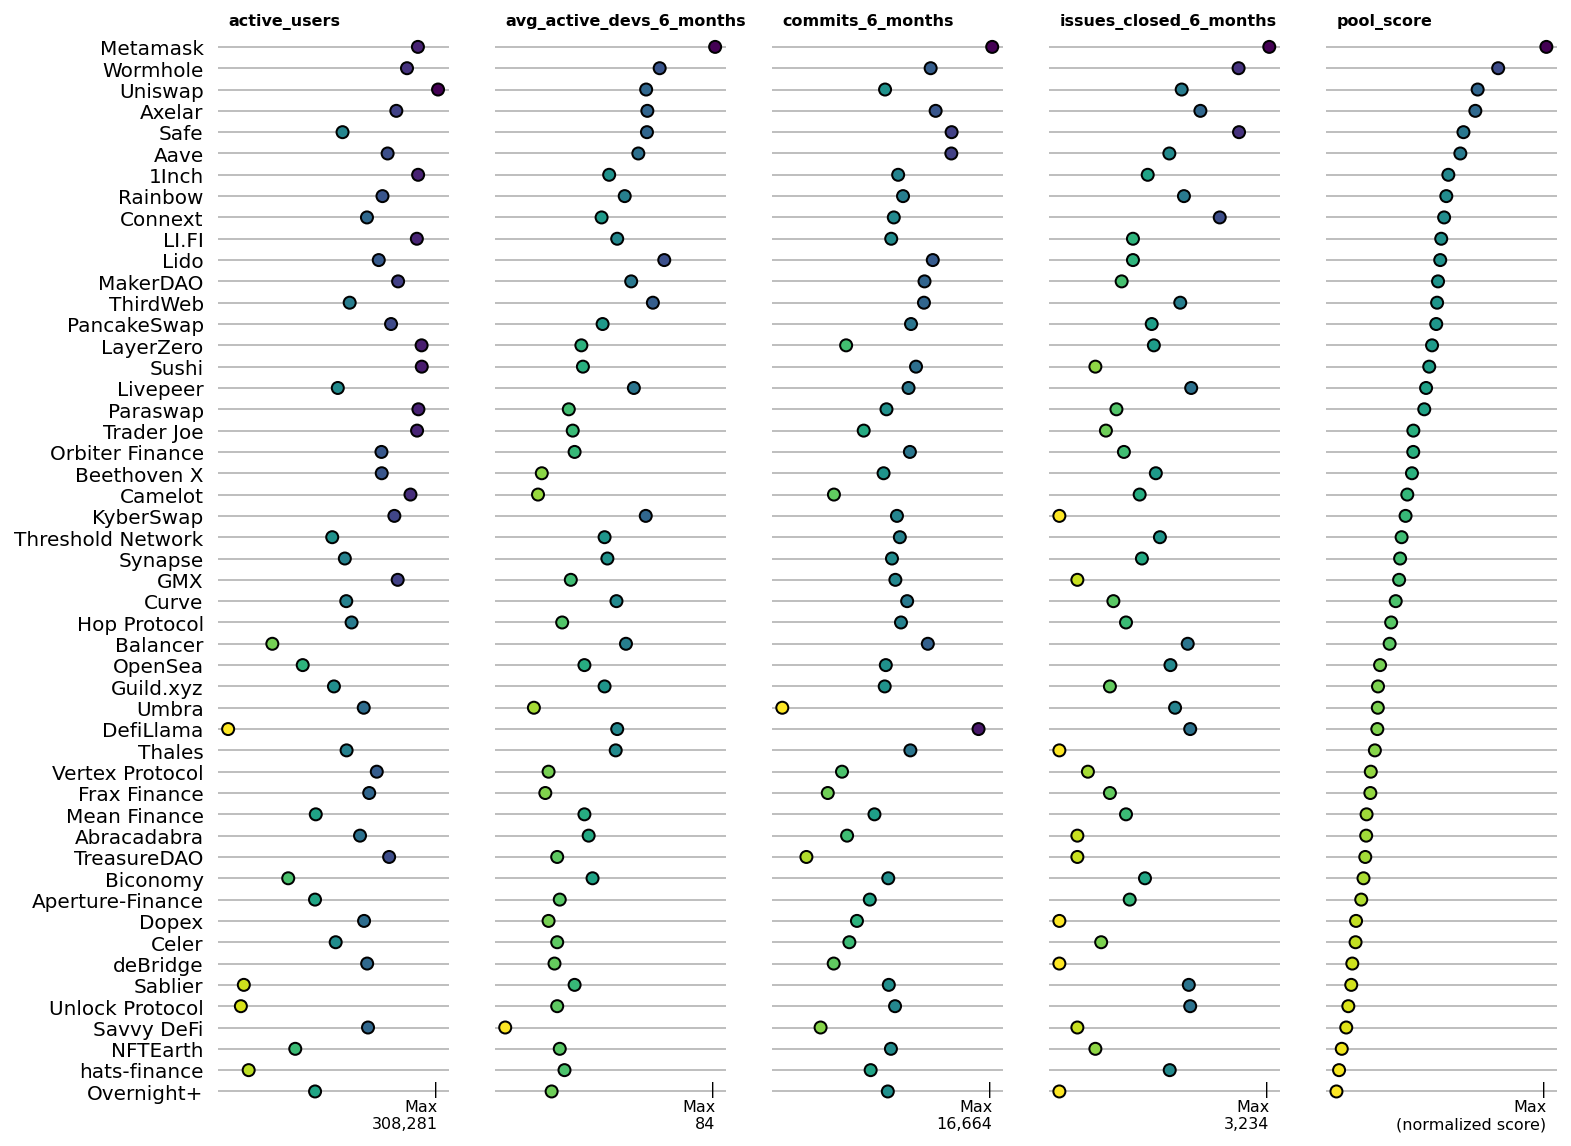

In [99]:
render_pool(momentum_pool)

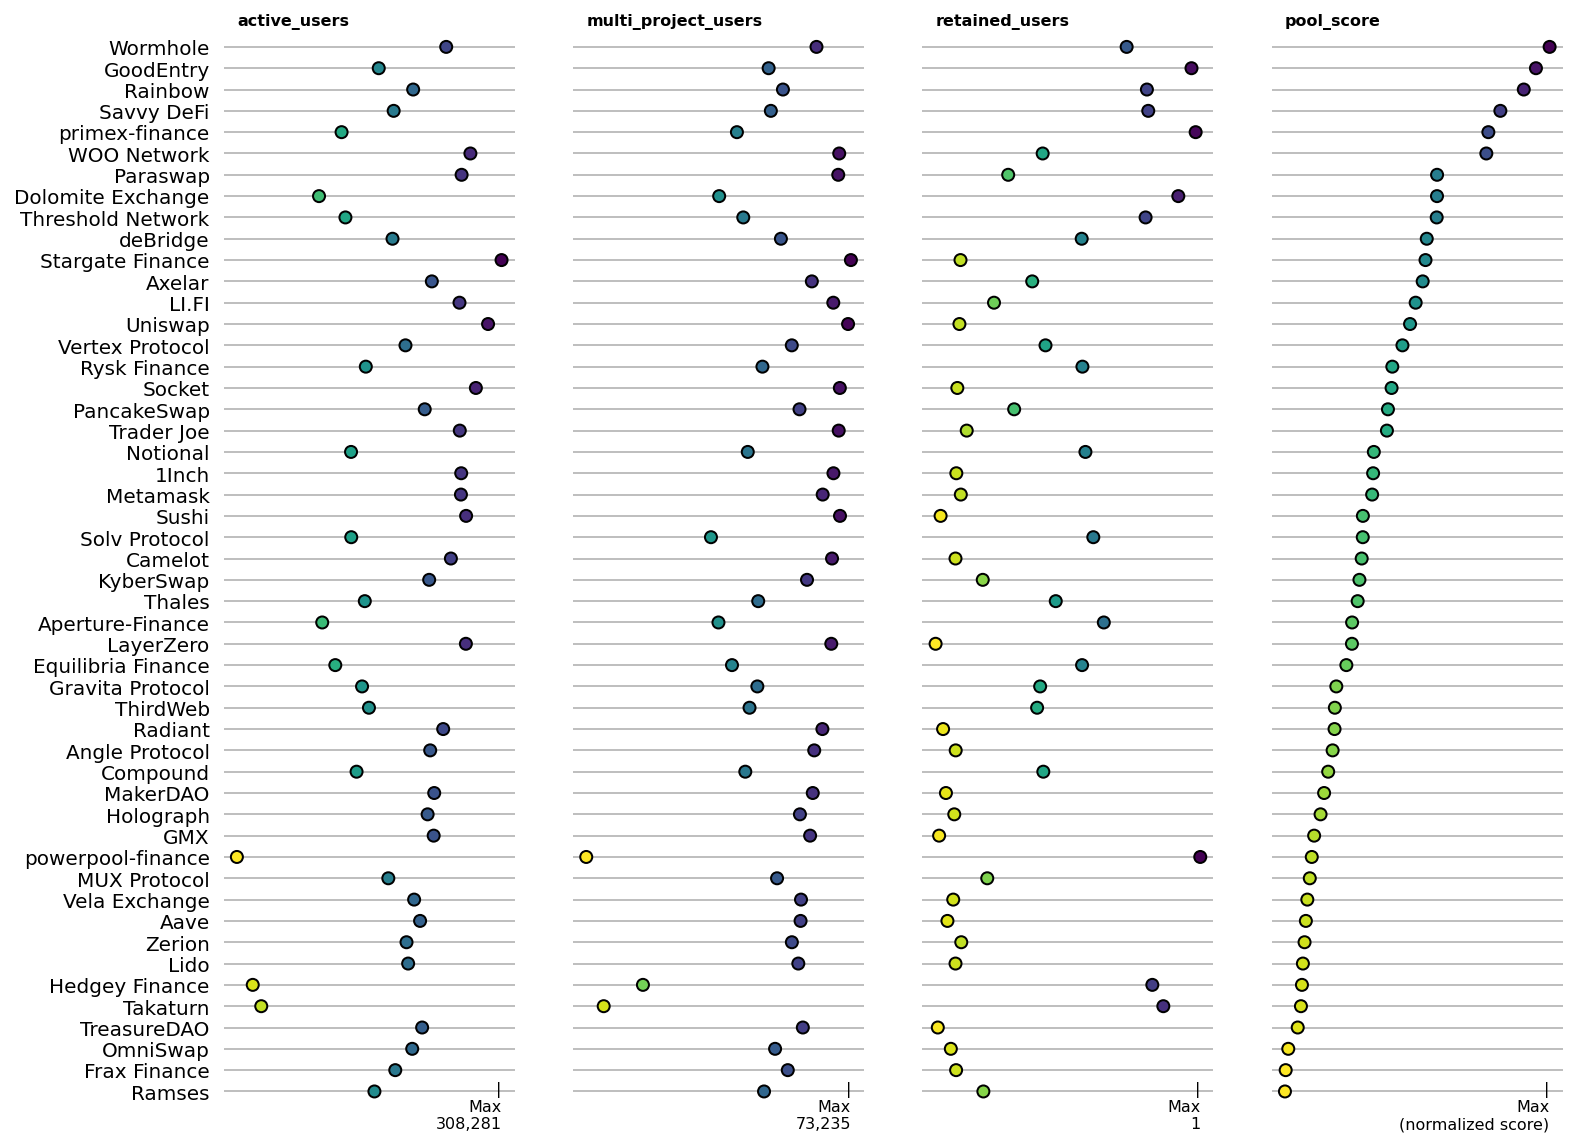

In [100]:
render_pool(users_pool)

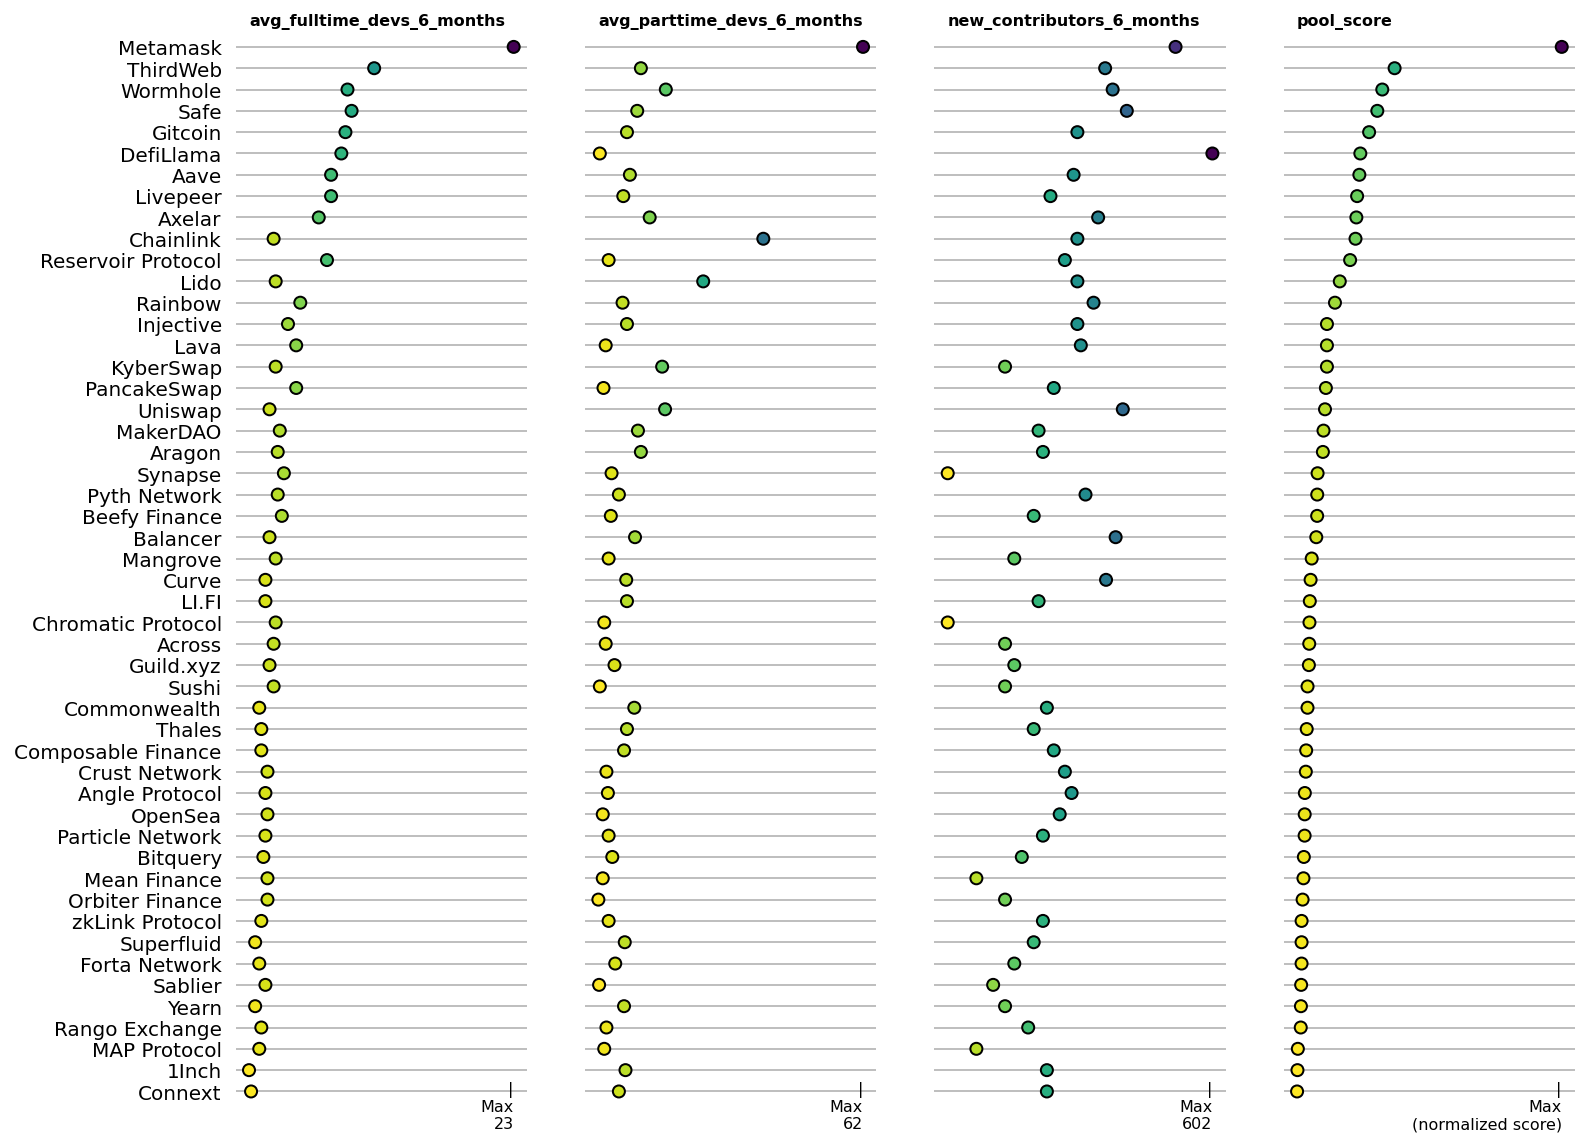

In [101]:
render_pool(dev_growth_pool)

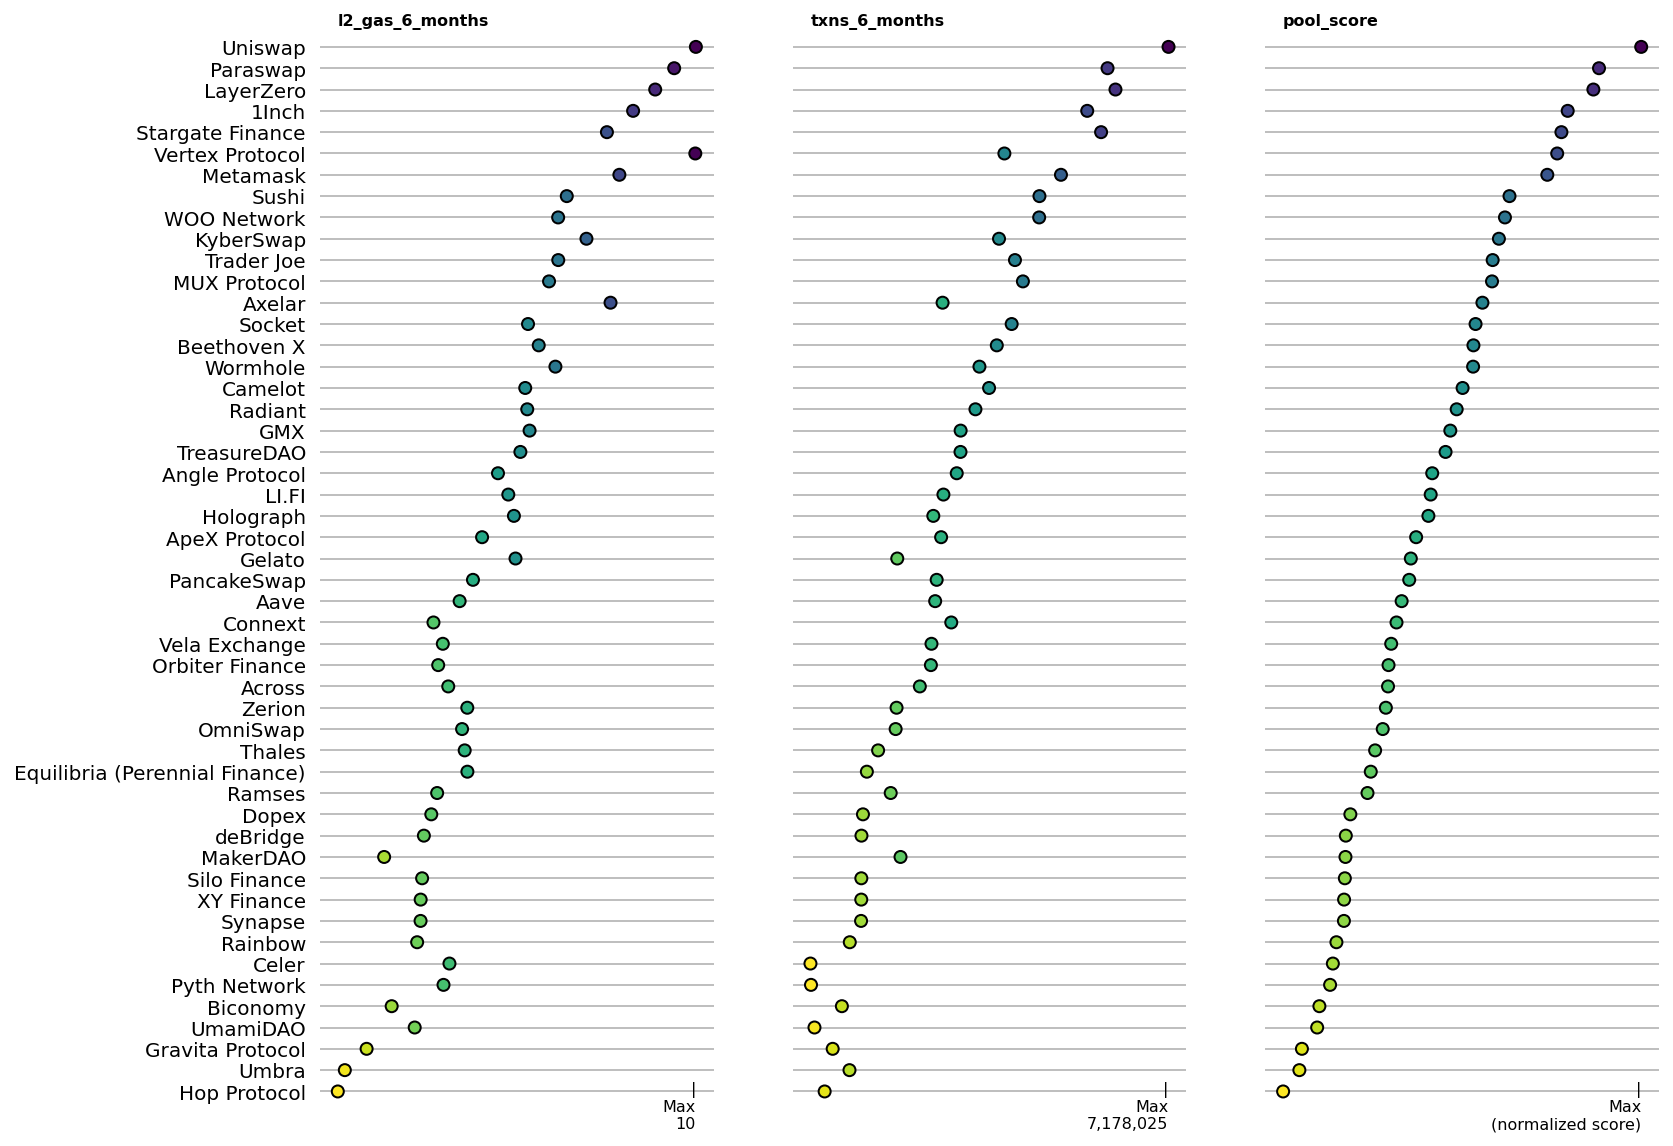

In [102]:
render_pool(blockspace_pool)